# 1

In [17]:
import pandas as pd
import numpy as np
from utils import print_latex_table
data = {
    'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
    'Bond Value': [36.9, 39.8, 42.4, 38.1, 36.4, 39.2, 44.6, 45.1],
    'CPI Value': [108.0, 110.3, 113.6, 116.1, 118.4, 120.9, 123.2, 125.4]
}
df = pd.DataFrame(data)

## (a)

In [18]:
df["Bond Simple Return"] = df["Bond Value"].pct_change() * 100

print_latex_table(
    df, ["Year", "Bond Value", "Bond Simple Return"], "Bond Simple Returns"
)

\begin{table}[H]
\centering
\caption{Bond Simple Returns}
\label{tab:bond_simple_returns}
\begin{tabular}{lrrr}
\toprule
Year & Bond Value & Bond Simple Return \\
\midrule
2006 & 36.90 & NaN \\
2007 & 39.80 & 7.86 \\
2008 & 42.40 & 6.53 \\
2009 & 38.10 & -10.14 \\
2010 & 36.40 & -4.46 \\
2011 & 39.20 & 7.69 \\
2012 & 44.60 & 13.78 \\
2013 & 45.10 & 1.12 \\
\bottomrule
\end{tabular}
\end{table}



## (b)

In [19]:
df['Bond CC Return'] = np.log(df['Bond Value'] / df['Bond Value'].shift(1)) * 100

print_latex_table(
    df, ["Year", "Bond Value", "Bond CC Return"], "Bond CC Returns"
)

\begin{table}[H]
\centering
\caption{Bond CC Returns}
\label{tab:bond_cc_returns}
\begin{tabular}{lrrr}
\toprule
Year & Bond Value & Bond CC Return \\
\midrule
2006 & 36.90 & NaN \\
2007 & 39.80 & 7.57 \\
2008 & 42.40 & 6.33 \\
2009 & 38.10 & -10.69 \\
2010 & 36.40 & -4.56 \\
2011 & 39.20 & 7.41 \\
2012 & 44.60 & 12.91 \\
2013 & 45.10 & 1.11 \\
\bottomrule
\end{tabular}
\end{table}



## (c)

In [20]:
cpi_2013 = df[df['Year'] == 2013]['CPI Value'].iloc[0]
df['Bond Price in 2013 terms'] = df['Bond Value'] * (cpi_2013 / df['CPI Value'])

print_latex_table(df, ["Year", "Bond Value", "Bond Price in 2013 terms"], "Bond Price in 2013 terms")

\begin{table}[H]
\centering
\caption{Bond Price in 2013 terms}
\label{tab:bond_price_in_2013_terms}
\begin{tabular}{lrrr}
\toprule
Year & Bond Value & Bond Price in 2013 terms \\
\midrule
2006 & 36.90 & 42.84 \\
2007 & 39.80 & 45.25 \\
2008 & 42.40 & 46.80 \\
2009 & 38.10 & 41.15 \\
2010 & 36.40 & 38.55 \\
2011 & 39.20 & 40.66 \\
2012 & 44.60 & 45.40 \\
2013 & 45.10 & 45.10 \\
\bottomrule
\end{tabular}
\end{table}



## (d)

In [21]:
df["CPI Simple Return"] = df["CPI Value"].pct_change() * 100
df['Bond Real Return'] = ((1 + df['Bond Simple Return']/100) / (1 + df['CPI Simple Return']/100)) - 1
df['Bond Real Return'] *= 100  # Convert to percentage

print_latex_table(df, ["Year", "Bond Value", "Bond Real Return"], "Bond Real Return")

\begin{table}[H]
\centering
\caption{Bond Real Return}
\label{tab:bond_real_return}
\begin{tabular}{lrrr}
\toprule
Year & Bond Value & Bond Real Return \\
\midrule
2006 & 36.90 & NaN \\
2007 & 39.80 & 5.61 \\
2008 & 42.40 & 3.44 \\
2009 & 38.10 & -12.08 \\
2010 & 36.40 & -6.32 \\
2011 & 39.20 & 5.47 \\
2012 & 44.60 & 11.65 \\
2013 & 45.10 & -0.65 \\
\bottomrule
\end{tabular}
\end{table}



# 2

**(a) Distribution of Y:**
Given $X_i$, $Y_i$ follows a normal distribution: $Y_i | X_i \sim N(\beta_0 + \beta_1X_i, \sigma^2)$.


**(b) Likelihood function:**
Given that $Y_i | X_i \sim N(\beta_0 + \beta_1X_i, \sigma^2)$, the conditional probability density function (pdf) of $Y_i$ given $X_i$ is:

$$f(y_i | x_i; \beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(- \frac{(y_i - (\beta_0 + \beta_1x_i))^2}{2\sigma^2}\right)$$

Since we have $n$ independent observations $(Y_1, X_1), (Y_2, X_2), ..., (Y_n, X_n)$, the likelihood function $L(\beta_0, \beta_1, \sigma^2)$ is the product of the individual conditional pdfs:
$$L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n} f(y_i | x_i; \beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(- \frac{(y_i - (\beta_0 + \beta_1x_i))^2}{2\sigma^2}\right) \right]$$
This can be rewritten as:
$$L(\beta_0, \beta_1, \sigma^2) = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^n \prod_{i=1}^{n} \exp\left(- \frac{(y_i - (\beta_0 + \beta_1x_i))^2}{2\sigma^2}\right)$$
$$L(\beta_0, \beta_1, \sigma^2) = (2\pi\sigma^2)^{-n/2} \exp\left(\sum_{i=1}^{n} \left[ - \frac{(y_i - (\beta_0 + \beta_1x_i))^2}{2\sigma^2} \right]\right)$$
$$L(\beta_0, \beta_1, \sigma^2) = (2\pi\sigma^2)^{-n/2} \exp\left(- \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i)^2\right)$$


**(c) MLE = OLS:**
To find the MLEs, we maximize the log-likelihood function $\ell(\beta_0, \beta_1, \sigma^2) = \ln(L(\beta_0, \beta_1, \sigma^2))$:
$$\ell(\beta_0, \beta_1, \sigma^2) = - \frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i)^2$$

To maximize $\ell$ with respect to $\beta_0$ and $\beta_1$, we take partial derivatives and set them to zero:
$$\frac{\partial\ell}{\partial\beta_0} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i) = 0  \implies  \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i) = 0$$
$$\frac{\partial\ell}{\partial\beta_1} = \frac{1}{\sigma^2} \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1x_i) = 0  \implies  \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1x_i) = 0$$

These are the normal equations for MLE.

Now consider Ordinary Least Squares (OLS). OLS estimators minimize the sum of squared residuals (SSR):
$$SSR(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i)^2$$

To minimize SSR, we take partial derivatives with respect to $\beta_0$ and $\beta_1$ and set them to zero:
$$\frac{\partial SSR}{\partial\beta_0} = -2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i) = 0  \implies  \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i) = 0$$
$$\frac{\partial SSR}{\partial\beta_1} = -2 \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1x_i) = 0  \implies  \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1x_i) = 0$$

We observe that the normal equations derived from MLE are identical to the normal equations derived from OLS. Therefore, the MLEs for $\beta_0$ and $\beta_1$ are identical to the OLS estimators, i.e., $\hat{\beta}_{0,ML} = \hat{\beta}_{0,OLS}$ and $\hat{\beta}_{1,ML} = \hat{\beta}_{1,OLS}$.

# 3

**PRF (Population Regression Function):**  Equation: $E(Y | X_i) = \beta_0 + \beta_1X_i$.  This equation describes the *true population relationship*.  Notice $E(Y|X_i)$, the *expected* average Y for a given X, and $\beta_0, \beta_1$, the *true population parameters* in the equation.

**SRF (Sample Regression Function):** Equation: $\hat{Y}_i =  \hat{\beta}_0 + \hat{\beta}_1X_i$. This equation is our *sample-based estimate*. See $\hat{Y}_i$, the *predicted* Y for an observation in our sample, and $\hat{\beta}_0, \hat{\beta}_1$, the *estimated parameters* derived from our sample data in the equation.

**Difference:** The core difference is in the equations' components.  PRF uses $E(Y|X_i)$ and true parameters ($\beta_0, \beta_1$) representing the *population's true relationship*. SRF uses $\hat{Y}_i$ and estimated parameters ($\hat{\beta}_0, \hat{\beta}_1$) to *estimate* this relationship from a *sample*.  Essentially, the SRF equation *estimates* the PRF equation using sample data.

# 4

Assumptions are made about the **unobservable error terms** ($\epsilon_i$), which are part of the population regression model, not directly about the **estimated residuals** ($e_i$), which are their sample counterparts. We assume properties for $\epsilon_i$ (like zero mean, etc.) to ensure our statistical inferences about the population parameters are valid. Residuals are calculated from the sample data *after* estimation and are used to *check* if the assumptions about the error terms are reasonably plausible in our sample, but the core assumptions are about the unobservable error terms in the population model, not the observable residuals in a specific sample.

# 5

Linear regression assumes $E(Y | X_i) = \beta_0 + \beta_1X_i$. This equation means the *average* value of $Y$ for a given $X_i$ is assumed to be a linear function of $X_i$.

Estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ from $\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1X_i$ estimate:

- $\beta_1$: the change in the *conditional mean* of $Y$ for a one-unit change in $X$.
- $\beta_0$: the *conditional mean* of $Y$ when $X$ is zero.

Meaning isn't guaranteed. If linearity is wrong or $X=0$ is irrelevant, interpretations (especially of $\hat{\beta}_0$) can be meaningless.

# 6

## (a)

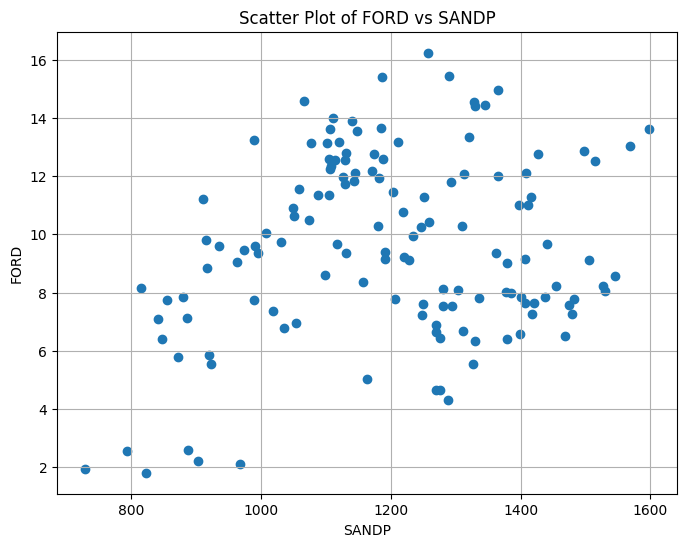

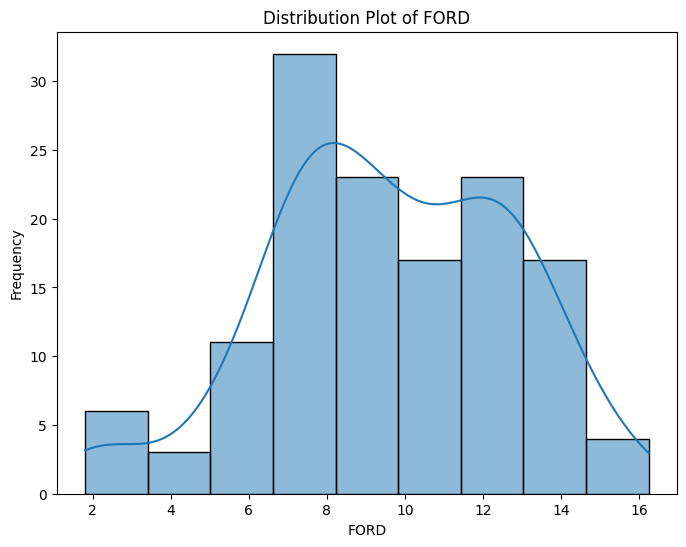

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ford.tsv', sep='\t')
ford_data = df[['Date', 'FORD', 'SANDP']].copy()

plt.figure(figsize=(8, 6))
plt.scatter(ford_data['SANDP'], ford_data['FORD'])
plt.title('Scatter Plot of FORD vs SANDP')
plt.xlabel('SANDP')
plt.ylabel('FORD')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(ford_data['FORD'], kde=True)
plt.title('Distribution Plot of FORD')
plt.xlabel('FORD')
plt.ylabel('Frequency')
plt.show()

Based on the scatter plot, there seems to be a positive relationship between the S&P and FORD. As the S&P increases, FORD also increases.

## (b)

In [23]:
def print_summary_statistics(df, columns=None):
    """Create summary statistics table with mode and median."""
    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns
        
    stats = []
    for col in columns:
        col_stats = {
            'Statistic': col,
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': df[col].mode().iloc[0],
            'Std Dev': df[col].std(),
            'Min': df[col].min(),
            'Max': df[col].max()
        }
        stats.append(col_stats)
    
    stats_df = pd.DataFrame(stats).set_index('Statistic')
    
    return print_latex_table(
        stats_df.round(2)[["Mean", "Median", "Mode", "Std Dev", "Min", "Max"]],
        value_cols=["Mean", "Median", "Mode", "Std Dev", "Min", "Max"],
        caption="Summary Statistics",
        label="tab:summary_stats",
    )

print_summary_statistics(ford_data[["FORD"]])

\begin{table}[H]
\centering
\caption{Summary Statistics}
\label{tab:summary_stats}
\begin{tabular}{lrrrrrr}
\toprule
Mean & Median & Mode & Std Dev & Min & Max \\
\midrule
9.60 & 9.42 & 9.35 & 3.12 & 1.81 & 16.24 \\
\bottomrule
\end{tabular}
\end{table}



**Mean, Mode, and Median**

The mean is the arithmetic average, calculated by summing all values and dividing by the number of values. It's important to note that the mean is sensitive to outliers, meaning extreme values can disproportionately influence it. The median, on the other hand, is the middle value in a dataset that has been sorted. This makes the median more robust to outliers as it's not pulled as much by extreme values. Finally, the mode is the most frequently occurring value within the dataset. There can be multiple modes or no mode at all. The most useful measure among these depends heavily on the data's distribution and the context of the analysis. For distributions that are roughly symmetrical, the mean, median, and mode tend to be similar. However, when dealing with skewed distributions, the median is often considered a more reliable measure of central tendency compared to the mean because of its resilience to outliers.

**Arithmetic vs. Geometric Mean**

When considering stock returns, it's important to distinguish between the arithmetic mean and the geometric mean. The arithmetic mean is simply the average of returns, but it can sometimes overestimate the actual growth of an investment over multiple periods, especially when volatility is present. This is because it doesn't fully account for the effects of compounding. In contrast, the geometric mean provides a more accurate picture of the compounded rate of return over multiple periods. It reflects the actual rate at which an investment grows over time, taking into account the compounding effect of returns. Therefore, for evaluating the long-term performance of stock investments, the geometric mean is generally considered a more useful metric as it provides a more realistic representation of investment growth.

## (c)

In [24]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResultsWrapper

ford_data['FORD_Return'] = ford_data['FORD'].pct_change()
ford_data['SANDP_Return'] = ford_data['SANDP'].pct_change()
ford_returns_data = ford_data.dropna()

y = ford_returns_data['FORD_Return']
X = ford_returns_data['SANDP_Return']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results: RegressionResultsWrapper = model.fit()

alpha_estimate = results.params['const']
beta_estimate = results.params['SANDP_Return']
alpha_stderr = results.bse['const']
beta_stderr = results.bse['SANDP_Return']

print_latex_table(
    pd.DataFrame({
        'Parameter': ['Alpha', 'Beta'],
        'Estimate': [alpha_estimate, beta_estimate],
        'Std. Error': [alpha_stderr, beta_stderr]
    }),
    value_cols=['Parameter', 'Estimate', 'Std. Error'],
    caption="Regression Results",
    label="tab:regression_results",
)

\begin{table}[H]
\centering
\caption{Regression Results}
\label{tab:regression_results}
\begin{tabular}{lrrr}
\toprule
Parameter & Estimate & Std. Error \\
\midrule
Alpha & 0.01 & 0.01 \\
Beta & 2.07 & 0.28 \\
\bottomrule
\end{tabular}
\end{table}



**Interpretation of Regression Results (FORD Stock):**

*   **Alpha ($\alpha$):** The estimated alpha for FORD is approximately 0.01 (or 1%), with a standard error of 0.01. This positive alpha suggests that, over the period analyzed, FORD may have slightly outperformed what the market model would predict based on its risk (beta). However, given that the alpha estimate is of similar magnitude to its standard error, the statistical significance of this alpha might be weak, 
and we cannot draw a definitive conclusion based on this result alone. 

*   **Beta ($\beta$):** The estimated beta for FORD is approximately 2.07, with a standard error of 0.28. This beta is significantly greater than 1.0.  It indicates that FORD stock is considerably more volatile than the market (SANDP). The beta estimate is statistically significant (much larger than its standard error), suggesting a robust relationship between FORD's returns and the market returns during this period.

## (d)

In [25]:
beta_p_value = results.pvalues['SANDP_Return']

print(f"P-value for Beta: {beta_p_value:.4f}")

P-value for Beta: 0.0000


There is statistically significant evidence that Beta ($\Beta$) is different from zero.
This suggests that there is a statistically significant relationship between FORD's return and the market (S&P) return. FORD's return is systematically related to market movements.

# 7

**Type I Error** means rejecting a true hypothesis.  Like falsely claiming someone is guilty.

**Type II Error** means failing to reject a false hypothesis. Like letting a guilty person go free.

The **Significance Level ($\alpha$):** means the chance of making a Type I error.  If we set it at 0.05 it means there is a 5% risk of a false positive.

**(a) Type I Error More Important:** Testing a new drug for safety.  A false positive (saying it's safe when it's not) could harm many.

**(b) Type II Error More Important:** Screening for a contagious disease. A false negative (missing a case) could lead to disease spread.

# 8

Hypotheses are tested about the **actual (population) coefficients** ($\beta_0, \beta_1$), not just our sample estimates ($\hat{\beta}_0, \hat{\beta}_1$).

We use sample estimates to *infer* about the true population values.  Hypothesis tests like testing if $\beta_1 = 0$ ask: "Is it likely the *true* slope in the population is zero, given our sample?".

Estimates vary sample to sample. We test claims about the fixed, population values, using our sample as evidence. We're interested in the underlying truth, not just describing our specific sample.